# 单变量线性回归

在本部分的练习中，您将使用一个变量实现线性回归，以预测食品卡车的利润。假设你是一家餐馆的首席执行官，正在考虑不同的城市开设一个新的分店。该连锁店已经在各个城市拥有卡车，而且你有来自城市的利润和人口数据。
您希望使用这些数据来帮助您选择将哪个城市扩展到下一个城市。

In [31]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

导入数据，并查看

In [32]:
path =  'ex1data1.txt'
# names添加列名，header用指定的行来作为标题，若原无标题且指定标题则设为None
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])  
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [33]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


在开始任何任务之前，通过可视化来理解数据通常是有用的。
对于这个数据集，您可以使用散点图来可视化数据，因为它只有两个属性(利润和人口)。
(你在现实生活中遇到的许多其他问题都是多维度的，不能在二维图上画出来。)

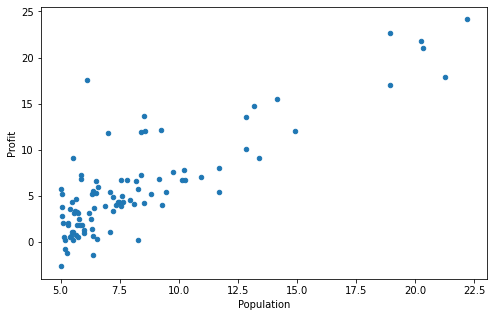

In [34]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(8,5))
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 以下代码示例中实现的方程在“练习”文件夹中的“ex1.pdf”中有详细说明。

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

计算代价函数 $J(\theta)$

In [35]:
def computeCost(X, y, theta):
    error = (X*theta.T) - y
    errors = error.T @ error  # (1,92) (92,1) 相当于平方然后求和
    cost = errors / (2 * len(X))
    
    return cost.getA()  # matrix tp array
    # inner = np.power(((X * theta.T) -  y), 2)   
    #return np.sum(inner) / (2 * len(X))

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [36]:
data.insert(0, 'Ones', 1)

现在我们来做一些变量初始化。

In [37]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


取最后一列为y，其余为X

In [38]:
# set X (training data) and y (target variable)
cols = data.shape[1]  # 列数
X = data.iloc[:,0:cols-1]  # 取前cols-1列，即输入向量
y = data.iloc[:,cols-1:cols] # 取最后一列，即目标向量

观察下 X (训练集) and y (目标变量)是否正确.

In [39]:
X.head()  # head()是观察前5行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [40]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


注意：这里我使用的是matrix而不是array，两者基本通用。
但是matrix的优势就是相对简单的运算符号，比如两个矩阵相乘，就是用符号\*，但是array相乘不能这么用，得用方法.dot()
array的优势就是不仅仅表示二维，还能表示3、4、5...维，而且在大部分Python程序里，array也是更常用的。

两者区别：
1. 对应元素相乘（数学中的点乘）：matrix可以用np.multiply(X2,X1)，array直接X1\*X2
2. 点乘（数学中的叉乘）：matrix直接X1\*X2或X1@X2，array可以 X1@X2 或 X1.dot(X2) 或 np.dot(X1, X2)

代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。

In [41]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix([0,0])

theta 是一个(1,2)矩阵

In [42]:
theta.shape

(1, 2)

看下维度，确保计算没问题

In [43]:
def computeCost(X, y, theta):
    error = (X*theta.T) - y
    errors = error.T @ error  # (1,92) (92,1) 相当于平方然后求和
    cost = errors / (2 * len(X))
    
    return cost.getA()  # matrix tp array 
    # inner = np.power(((X * theta.T) -  y), 2)   
    #return np.sum(inner) / (2 * len(X))
    
computeCost(X, y, theta)

array([[32.07273388]])

In [44]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算初始代价函数的值 (theta初始值为0).

In [45]:
computeCost(X, y, theta)

array([[32.07273388]])

# batch gradient decent（批量梯度下降）
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 
优化：
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
$$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum^{m}_{i=1}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

使用vectorization同时更新所有的 θ，可以大大提高效率

In [46]:
X.shape, theta.shape, y.shape, X.shape[0]

((97, 2), (1, 2), (97, 1), 97)

In [47]:
def gradientDescent(X, y, theta, alpha, epoch):
    """reuturn theta, cost"""
    
    temp = np.matrix(np.zeros(theta.shape))  # 初始化一个 θ 临时矩阵(1, 2)
    parameters = int(theta.flatten().shape[1])  # 参数 θ的数量
    cost = np.zeros(epoch)  # 初始化一个ndarray，包含每次epoch的cost
    m = X.shape[0]  # 样本数量m
    
    for i in range(epoch):
        
        temp =theta - (alpha / m) * (X * theta.T - y).T * X
        
# 以下是不用Vectorization求解梯度下降
#         error = (X * theta.T) - y  # (97, 1)
        
#         for j in range(parameters):
#             term = np.multiply(error, X[:,j])  # (97, 1)
#             temp[0,j] = theta[0,j] - ((alpha / m) * np.sum(term))  # (1,1)
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [48]:
alpha = 0.01
epoch = 1000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [49]:
final_theta, cost = gradientDescent(X, y, theta, alpha, epoch)
final_theta

matrix([[-3.24140214,  1.1272942 ]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [50]:
computeCost(X, y, final_theta)

array([[4.5159555]])

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

np.linspace()在指定的间隔内返回均匀间隔的数字。

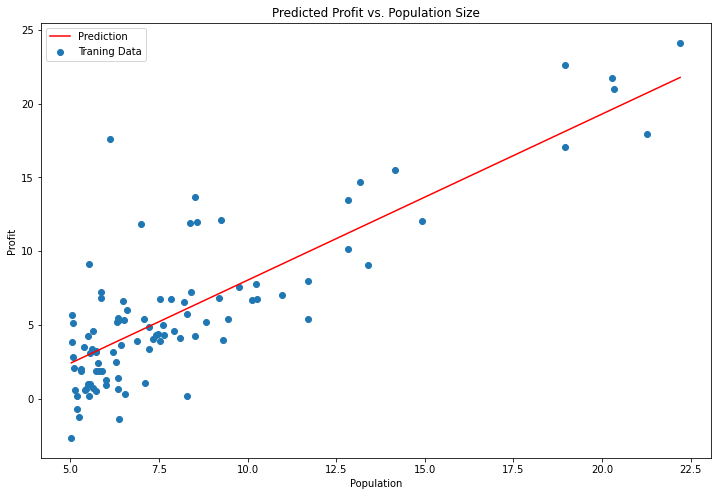

In [51]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  # 横坐标
f = final_theta[0, 0] + (final_theta[0, 1] * x)  # 纵坐标，利润

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data['Population'], data.Profit, label='Traning Data')
ax.legend(loc=2)  # 2表示在左上角
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，线性回归中的代价函数总是降低的 - 这是凸优化问题的一个例子。

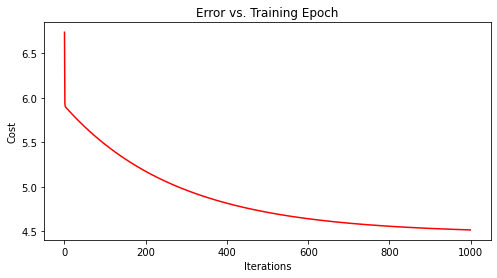

In [52]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(epoch), cost, 'r')  # np.arange()返回等差数组
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [53]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - **特征归一化**。 这个对于pandas来说很简单

In [54]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [55]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, epoch)

# get the cost (error) of the model
computeCost(X2, y2, g2), g2

(array([[0.13070337]]),
 matrix([[-9.70922236e-17,  8.78503652e-01, -4.69166570e-02]]))

In [ ]:
def predict_price(size, bedrooms):
    predict = np.matrix([size, bedrooms])
    path =  'ex1data2.txt'
    data_p = pd.read_csv(path, names=['Size', 'Bedrooms', 'Price'])
    predict_mean = np.matrix([data_p.mean().Size, data_p.mean().Bedrooms])
    predict_std = np.matrix([data_p.std().Size, data_p.std().Bedrooms])
    predict_n = (predict - predict_mean) / predict_std  # matrix/matrix 是逐个元素
    predict_n = predict_n.getA()
    predict_n = np.insert(predict_n, 0, values=np.ones(1), axis=1)
    predict_n = np.matrix(predict_n)
    price = float(predict_n * g2.T) * data_p.std().Price + data_p.mean().Price
    
    return price

predict_price(1650, 3)

In [131]:
我们也可以快速查看这一个的训练进程。

293251.85751775693

我们也可以快速查看这一个的训练进程。

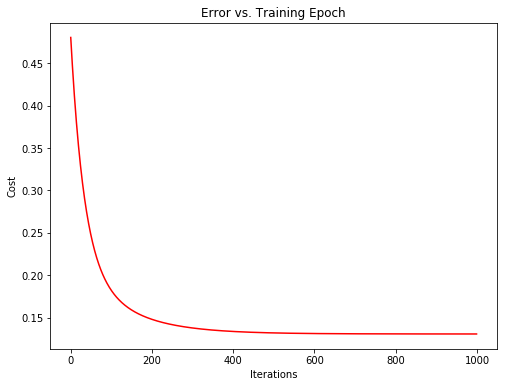

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(epoch), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [27]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

scikit-learn model的预测表现

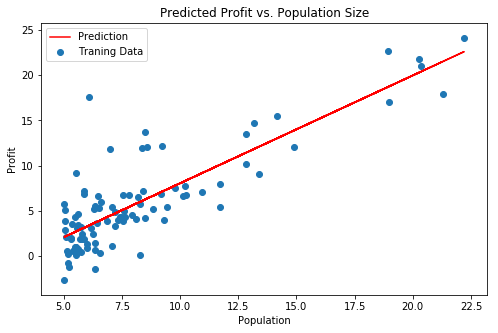

In [28]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [29]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [30]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

In [31]:
#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

在练习2中，我们将看看分类问题的逻辑回归。